In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import altair as alt
from altair import expr, datum
# Uncomment/run this line to enable Altair in the notebook (not JupyterLab):
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

Connect Google Colab with Google Drive. Please follow the instruction in the terminal to authorize to your Google Drive account.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set the path to the dataset
1. Look on the folder icon in the left panel. Locate the vis_notebook data folder in /content/drive/My Drive/...
2. Right-click on the data and select Copy Path. Store this copied path into a variable and you are ready to go.

In [0]:
path = "/content/drive/My Drive/VAST Challenge 2020/MC1/data/"

### Data Preparation

In [0]:
n = dict()
e = dict()

In [0]:
nodes = pd.read_csv(path + "CGCS-Template-NodeTypes.csv")
nodes["NodeType"] = nodes["NodeType"].replace({1: "Person", 2: "Product", 3: "Document", 4: "Financial", 5: "Country"})
edges = pd.read_csv(path + "CGCS-Template.csv")
edges["eType"] = edges["eType"].replace({0: "Phone", 1: "Email", 2: "Sell", 3: "Buy", 4: "Author-of", 5: "Financial", 6: "Travels-to"})
edges = edges.merge(nodes, how="left", left_on="Source", right_on="NodeID").rename(columns={"NodeType": "SourceType"}).drop("NodeID", axis=1)
edges = edges.merge(nodes, how="left", left_on="Target", right_on="NodeID").rename(columns={"NodeType": "TargetType"}).drop("NodeID", axis=1)

In [0]:
n['CGCS-Template'] = nodes[nodes['NodeID'].isin(set(edges['Source']).union(set(edges['Target'])))]
e['CGCS-Template'] = edges

In [0]:
nodes = pd.read_csv(path + "CGCS-GraphData-NodeTypes.csv")
nodes["NodeType"] = nodes["NodeType"].replace({1: "Person", 2: "Product", 3: "Document", 4: "Financial", 5: "Country"})
for name in ["Q1-Graph1", "Q1-Graph2", "Q1-Graph3", "Q1-Graph4", "Q1-Graph5"]:
    edges = pd.read_csv(path + name + ".csv")
    edges["eType"] = edges["eType"].replace({0: "Phone", 1: "Email", 2: "Sell", 3: "Buy", 4: "Author-of", 5: "Financial", 6: "Travels-to"})
    edges = edges.merge(nodes, how="left", left_on="Source", right_on="NodeID").rename(columns={"NodeType": "SourceType"}).drop("NodeID", axis=1)
    edges = edges.merge(nodes, how="left", left_on="Target", right_on="NodeID").rename(columns={"NodeType": "TargetType"}).drop("NodeID", axis=1)
    n[name] = nodes[nodes['NodeID'].isin(set(edges['Source']).union(set(edges['Target'])))]
    e[name] = edges

### Edges count

In [0]:
# Combine all edges

### Communication
- The weight for communications is always 1, representing 1 call or email.
- Some records have location information, and some do not.

My findings: 
- There are some locations for phone but not e-mail. 
- Locations are distinct for each node. I think we can consider it as a node property.
- There is no latitude and longitude information in the template graph. I just remove it from the analysis because we cannot mapped the coordinates. (See Location, Latitude, Longitude.ipynb)

#### E-mail

In [0]:
m = dict()
for name, edges in e.items():
    m[name] = edges.loc[edges['eType'] == 'Email', ['Source', 'Target', 'Time', 'Weight', 'SourceLocation', 'TargetLocation']]

In [11]:
m['CGCS-Template']

Source  Target      Time  Weight  SourceLocation  TargetLocation
3        34      27    107548       1             5.0             5.0
5        34      37    137358       1             5.0             5.0
8        41      37    149161       1             5.0             5.0
11       27      37    177201       1             5.0             5.0
12       37      41    183172       1             5.0             5.0
..      ...     ...       ...     ...             ...             ...
609      41      56  26980042       1             5.0             0.0
611      57      41  27014691       1             0.0             5.0
613      57      56  27054205       1             0.0             0.0
619      41      57  27160169       1             5.0             0.0
620      57      56  27205975       1             0.0             0.0

[249 rows x 6 columns]

In [12]:
m['Q1-Graph1']

Source  Target      Time  Weight  SourceLocation  TargetLocation
9    490041  589639   1417381     1.0             0.0             0.0
10   599956  635665   1423376     1.0             0.0             0.0
12   599956  589639   1465986     1.0             0.0             0.0
13   490041  635665   1523000     1.0             0.0             0.0
14   599956  589639   1536819     1.0             0.0             0.0
..      ...     ...       ...     ...             ...             ...
352  640464  570411  24900262     1.0             0.0             0.0
353  635665  570411  24914745     1.0             0.0             0.0
355  640464  635665  25023225     1.0             0.0             0.0
357  640464  570411  25114159     1.0             0.0             0.0
358  635665  570411  25132002     1.0             0.0             0.0

[131 rows x 6 columns]

#### Phone call

In [0]:
c = dict()
for name, edges in e.items():
    c[name] = edges.loc[edges['eType'] == 'Phone', ['Source', 'Target', 'Time', 'Weight', 'SourceLocation', 'TargetLocation']]

In [14]:
c['CGCS-Template']

Source  Target      Time  Weight  SourceLocation  TargetLocation
1        41      34     86400       1             NaN             NaN
2        37      27     94461       1             NaN             NaN
4        41      37    127838       1             NaN             NaN
6        27      41    137514       1             NaN             NaN
7        27      41    146000       1             NaN             NaN
..      ...     ...       ...     ...             ...             ...
612      41      56  27049212       1             NaN             NaN
615      56      57  27097980       1             NaN             NaN
616      56      41  27135128       1             NaN             NaN
617      56      57  27150761       1             NaN             NaN
621      41      57  27222388       1             NaN             NaN

[314 rows x 6 columns]

In [15]:
c['Q1-Graph3']

Source  Target      Time  Weight  SourceLocation  TargetLocation
3    538892  614761   2020424     1.0             NaN             NaN
5    500813  542965   2274331     1.0             NaN             NaN
6    500813  614761   2380177     1.0             NaN             NaN
7    614761  542965   2430149     1.0             NaN             NaN
9    500813  538892   2975300     1.0             NaN             NaN
..      ...     ...       ...     ...             ...             ...
182  544074  541619  19884838     1.0             NaN             NaN
183  538892  541619  20000695     1.0             NaN             NaN
185  541619  544074  20033852     1.0             NaN             NaN
186  544074  538892  20064067     1.0             NaN             NaN
189  541619  538892  20176137     1.0             NaN             NaN

[109 rows x 6 columns]

Proof that e-mail location are unique for each node

In [0]:
temp = m['Q1-Graph1']
source_locs = (temp[['Source', 'SourceLocation', 'Weight']]
                 .rename(columns={'Source': 'NodeID', 'SourceLocation': 'Location'}))
target_locs = (temp[['Target', 'TargetLocation', 'Weight']]
                 .rename(columns={'Target': 'NodeID', 'TargetLocation': 'Location'}))
all_locs = pd.concat([source_locs, target_locs])

In [17]:
all_locs.groupby(['NodeID']).agg({
    'Location': 'nunique',
    'Weight': 'sum'
})

Location  Weight
NodeID                  
464459         1     5.0
490041         1    22.0
492777         1    26.0
493044         1    13.0
533140         1    10.0
550361         1    11.0
568093         1     2.0
570411         1     9.0
589639         1    17.0
591682         1     2.0
596193         1     6.0
599956         1    33.0
616050         1     9.0
623295         1    22.0
632150         1    12.0
635665         1    50.0
640464         1    13.0

Visualizing the communication network

see: Communication Network.ipynb

The node-link diagram below describe color the node with location attribute.

In [0]:
all_locs = all_locs.drop_duplicates()

In [19]:
all_locs

NodeID  Location  Weight
9    490041       0.0     1.0
10   599956       0.0     1.0
45   632150       2.0     1.0
46   635665       0.0     1.0
47   616050       2.0     1.0
61   533140       2.0     1.0
145  464459       0.0     1.0
210  623295       3.0     1.0
222  492777       3.0     1.0
227  550361       2.0     1.0
316  589639       0.0     1.0
340  640464       0.0     1.0
46   568093       0.0     1.0
61   591682       2.0     1.0
98   493044       2.0     1.0
115  570411       0.0     1.0
123  596193       2.0     1.0

In [0]:
locations = []
for i in range(0, 6):
    locations.append(list(all_locs.loc[all_locs['Location'] == i, 'NodeID']))

In [0]:
G = nx.from_pandas_edgelist(temp, 'Source', 'Target', ['Weight'], nx.DiGraph())

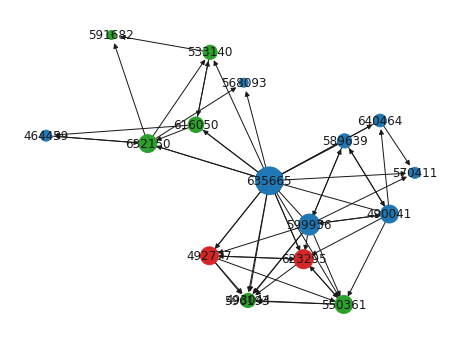

In [22]:
pos = nx.kamada_kawai_layout(G)

plt.subplots(figsize=(8, 6))

# Nodes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for l in locations:
    degrees = [degree * 40 for node, degree in G.degree(l, weight='Weight')]
    nx.draw_networkx_nodes(G, pos, nodelist=l, node_size=degrees, node_color=colors.pop(0))
nx.draw_networkx_labels(G, pos, font_size=12)
    
# Edges
#edge_colors = ['blue' if eType == 'Phone' else 'red' for source, target, eType in G.edges(data='eType')]
nx.draw_networkx_edges(G, pos)

plt.axis('off')
plt.show()

Distribution of location

In [0]:
l = []
for name, edges in m.items():
    source_locs = (edges[['Source', 'SourceLocation', 'Weight']]
                 .rename(columns={'Source': 'NodeID', 'SourceLocation': 'Location'}))
    target_locs = (edges[['Target', 'TargetLocation', 'Weight']]
                     .rename(columns={'Target': 'NodeID', 'TargetLocation': 'Location'}))
    all_locs = pd.concat([source_locs, target_locs])
    all_locs = all_locs.drop_duplicates()
    all_locs['Graph'] = name
    l.append(all_locs)

In [0]:
source = pd.concat(l)

In [0]:
source = source.groupby(['Graph', 'Location']).agg({
    'NodeID': 'count'
}).reset_index()

In [26]:
alt.Chart(source).mark_bar().encode(
    x='Location:N',
    y='NodeID:Q',
    row='Graph:N',
    color=alt.Color('Location:N', 
                    scale=alt.Scale(
                        domain=['0', '1', '2', '3', '4', '5'],
                        range=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',  '#8c564b']))
).properties(
    height=50
)

alt.Chart(...)

### Procurement
- The two people can be linked via the item they are both connected to.
- There may also be communications between the two people.
- The weight for procurements represents the value of the item.
- Procurements do not have location information.

My findings:
- Some buy and sell relationships cannot be fully mapped (see Q1-Graph5 and Q1-Graph4)

In [0]:
p = dict()
for name, edges in e.items():
    sell = edges.loc[edges['eType'] == 'Buy', ['Source', 'Target', 'Time', 'Weight']]
    buy = edges.loc[edges['eType'] == 'Sell', ['Source', 'Target', 'Time', 'Weight']]
    procurement = sell.merge(buy, how='outer', on=["Target", "Time", "Weight"], suffixes=('_sell', '_buy')) 
    p[name] = procurement

In [28]:
p['CGCS-Template']

Source_sell  Target      Time  Weight  Source_buy
0           39  657187   9519349     300          67
1           39  657187  11623738     100          67
2           39  657187  11775168     100          67
3           39  657187  13629169     300          67
4           39  657187  14475818     600          67
5           39  657187  15251393     300          67
6           39  657187  15278449     600          67
7           39  657187  17295721     800          67
8           39  657187  19649264     300          67

In [29]:
p['Q1-Graph4']

Source_sell  Target      Time  Weight  Source_buy
0      636721.0  461577   1669171     8.0         NaN
1      636721.0  629826   1775557   230.0         NaN
2      636721.0  618398   1854984    14.0         NaN
3      636721.0  588802   2852810   596.0         NaN
4      636721.0  499177   3136351     1.0         NaN
5      636721.0  482579   9689338    24.0         NaN
6      636721.0  638734  11233222   191.0         NaN
7      636721.0  557626  12293584   134.0         NaN
8      636721.0  492039  16031937     1.0         NaN
9      636721.0  588802  20247857    62.0         NaN
10     636721.0  605235  23173937     1.0         NaN
11     636721.0  590595  26476581   277.0         NaN
12          NaN  585417     98586  1398.0    636721.0
13          NaN  655265   2776828   724.0    636721.0
14          NaN  655265  10115448     2.0    636721.0
15          NaN  655265  10807225  1312.0    636721.0
16          NaN  655265  31106062   118.0    636721.0

Plot the relationship between Person and Product

In [0]:
temp = []
for name, edges in e.items():
    a = edges.loc[(edges['eType'] == 'Buy') | (edges['eType'] == 'Sell'), ['Source', 'Target', 'Time', 'Weight', 'eType']]
    a['Graph'] = name
    temp.append(a)
temp = pd.concat(temp)

In [31]:
alt.Chart(temp).mark_circle().encode(
    x=alt.X('Target:N', title='Product'),
    y=alt.Y('Source:N', title='Person'),
    size='sum(Weight):Q',
    color='eType:N',
).facet(
    row='Graph:N'
).resolve_scale(y='independent')

alt.FacetChart(...)

### Co-authorship
- The source column contains the person who is the author, and the target column contains a unique identifier for the publication.
-  The weight column indicates the fraction of the authors for the given publication.
- The time for publications occurs before all other records in the data so the values are negative.
- The co-authorship channel in the template includes values replaced by -99. This indicates that any publication would satisfy a match at any time and with any given weight. 

My findings:
- I cannot find group of co-authors in any graphs (the article that wrote by >1 author).

In [0]:
a = []
for name, edges in e.items():
    temp = edges.loc[edges['eType'] == 'Author-of', ['Source', 'Target', 'eType', 'Time', 'Weight']]
    temp['Graph'] = name
    a.append(temp)
a = pd.concat(a)
a = a[a['Graph'] != 'CGCS-Template']

In [33]:
a

Source  Target      eType       Time    Weight      Graph
0  616050  590502  Author-of -662041253  0.166667  Q1-Graph1
0  563211  564798  Author-of -732727926  0.018868  Q1-Graph2
1  563211  627390  Author-of -496596726  0.200000  Q1-Graph2
2  563211  561114  Author-of -277745526  0.250000  Q1-Graph2
3  541017  601492  Author-of  -64423926  0.142857  Q1-Graph2
0  614761  514306  Author-of -209742644  0.100000  Q1-Graph3

In [34]:
alt.Chart(a).mark_circle().encode(
    x=alt.X('Target:N', title='Document'),
    y=alt.Y('Source:N', title='Person'),
    size='sum(Weight):Q',
    color='eType:N',
).facet(
    row='Graph:N'
).resolve_scale(y='independent')

alt.FacetChart(...)

### Travel
- Time represents the start of a trip and weight represents the length of the trip in days. All location columns should have data for each record. 
- The SourceLocation and TargetLocation columns have identifiers for countries of the origin and destination of each trip.

In [0]:
travel = []
for name, edges in e.items():
    a = edges.loc[edges['eType'] == 'Travels-to',  ['Source', 'Target', 'Time', 'Weight', 'SourceLocation', 'TargetLocation']]
    a['Trip'] = a['SourceLocation'].astype(int).apply(str) + "->" + a['TargetLocation'].astype(int).apply(str)
    a['Graph'] = name
    
    travel.append(a)
    
travel = pd.concat(travel)

My findings:
- Country IDs are the same for all 5 candidate graphs. The template graph has a distinct set of 
- Country IDs in the candidate graphs are the same set of locations. The template graph has a disrtinct set of Country IDs.
- Each location has a distinct location. So we can mapped the country between template and candidate graphs with location IDs.

In [36]:
travel.groupby(['Target', 'TargetLocation']).agg({
    'Graph': 'nunique',
    'Source': 'count',
    'Weight': 'sum',
})

Graph  Source  Weight
Target TargetLocation                       
69     4.0                 1      10    26.0
70     3.0                 1      13    31.0
71     0.0                 1       9    27.0
72     5.0                 1       6    19.0
76     2.0                 1       7    19.0
81     1.0                 1       7    14.0
499467 2.0                 5      35    96.0
509607 4.0                 5      64   156.0
561157 0.0                 4      68    35.0
616453 5.0                 4      55   106.0
625756 3.0                 5      70   140.0
657173 1.0                 5      31   112.0

- The original location of the person (Source and SourceLocation) can be diffierent within the same person who went to different trips.

In [37]:
travel.groupby(['Graph', 'Source']).agg({
    'SourceLocation': 'nunique'
})

SourceLocation
Graph         Source                
CGCS-Template 39                   4
              40                   4
              41                   4
              73                   3
              74                   3
...                              ...
Q1-Graph5     477657               3
              483784               3
              573137               2
              594308               1
              619322               3

[64 rows x 1 columns]

- Graph 4 and 5: there are some people who have repeat the same trips.
- Surprisingly, the weight can be negative number. I don't know why? It suppose to be the number of days of the trip.

In [38]:
travel[travel['Graph'] == 'Q1-Graph5']

Source  Target      Time  ...  TargetLocation  Trip      Graph
9    619322  657173   1987200  ...             1.0  5->1  Q1-Graph5
10   619322  657173   1987200  ...             1.0  5->1  Q1-Graph5
11   619322  657173   1987200  ...             1.0  5->1  Q1-Graph5
12   619322  657173   1987200  ...             1.0  5->1  Q1-Graph5
13   619322  657173   1987200  ...             1.0  5->1  Q1-Graph5
..      ...     ...       ...  ...             ...   ...        ...
177  573137  509607  28684800  ...             4.0  3->4  Q1-Graph5
178  573137  509607  28684800  ...             4.0  3->4  Q1-Graph5
179  573137  509607  28684800  ...             4.0  3->4  Q1-Graph5
180  573137  509607  28684800  ...             4.0  3->4  Q1-Graph5
181  573137  509607  28684800  ...             4.0  3->4  Q1-Graph5

[110 rows x 8 columns]

In [39]:
travel.groupby(['Graph', 'Source', 'Target']).agg({
    'Weight': ['count', 'sum']
}).tail(40)

Weight      
                         count   sum
Graph     Source Target             
Q1-Graph3 635665 625756      1   5.0
          643411 561157      1   1.0
          643925 509607      1   4.0
                 561157      1   5.0
                 625756      1   3.0
          649553 509607      1   2.0
                 616453      1   6.0
                 625756      1   1.0
Q1-Graph4 464579 561157      5  -5.0
                 625756      5  25.0
          482012 509607      5  15.0
                 561157      5  15.0
                 616453      5  10.0
                 625756      5  -5.0
          492850 616453     10  50.0
                 625756     15 -15.0
          569329 499467      5  25.0
                 509607      5  20.0
                 561157     15 -15.0
                 616453      5   5.0
                 625756      5  20.0
                 657173      5   5.0
          580798 499467      5  -5.0
                 509607      5   5.0
                 625756      5  25.0
                 657173      5  20.0
Q1-Graph5 477657 499467      5  25.0
                 561157      5   5.0
                 616453     15   5.0
                 625756      5  15.0
          483784 561157     20 -20.0
          573137 509607      5  -5.0
                 616453      5   0.0
          594308 509607     10  10.0
                 561157      5  20.0
                 616453      5   5.0
          619322 509607     10  30.0
                 616453      5  10.0
                 625756      5  -5.0
                 657173     10  55.0

Visualize the Person (Source) to Location (Target) network

In [40]:
alt.Chart(travel).mark_circle().encode(
    x=alt.X('TargetLocation:N', title='Location'),
    y=alt.Y('Source:N', title='Person'),
    size='sum(Weight):Q',
    color='TargetLocation:N',
).facet(
    column='Graph:N'
).resolve_scale(y='independent')

alt.FacetChart(...)

In [41]:
alt.Chart(travel).mark_circle().encode(
    x=alt.X('Target:N', title='Location'),
    y=alt.Y('Source:N', title='Person'),
    size='sum(Weight):Q',
    color='TargetLocation:N',
).facet(
    column='Graph:N'
).resolve_scale(x='independent', y='independent')

alt.FacetChart(...)

In [42]:
travel

Source  Target      Time  ...  TargetLocation  Trip          Graph
187      78      81  11773606  ...             1.0  3->1  CGCS-Template
192      80      70  12292006  ...             3.0  4->3  CGCS-Template
193      80      81  12292006  ...             1.0  3->1  CGCS-Template
210      77      70  12464806  ...             3.0  4->3  CGCS-Template
225      79      81  12637606  ...             1.0  3->1  CGCS-Template
..      ...     ...       ...  ...             ...   ...            ...
177  573137  509607  28684800  ...             4.0  3->4      Q1-Graph5
178  573137  509607  28684800  ...             4.0  3->4      Q1-Graph5
179  573137  509607  28684800  ...             4.0  3->4      Q1-Graph5
180  573137  509607  28684800  ...             4.0  3->4      Q1-Graph5
181  573137  509607  28684800  ...             4.0  3->4      Q1-Graph5

[375 rows x 8 columns]

Trip = from source location to target location.

In [43]:
alt.Chart(travel).mark_circle().encode(
    x=alt.X('Trip:N', title='Trip'),
    y=alt.Y('Source:N', title='Person'),
    size='sum(Weight):Q',
    color='sum(Weight):Q',
).facet(
    row='Graph:N'
).resolve_scale(y='independent')

alt.FacetChart(...)

Node matching with traveling profile

In [44]:
travel

Source  Target      Time  ...  TargetLocation  Trip          Graph
187      78      81  11773606  ...             1.0  3->1  CGCS-Template
192      80      70  12292006  ...             3.0  4->3  CGCS-Template
193      80      81  12292006  ...             1.0  3->1  CGCS-Template
210      77      70  12464806  ...             3.0  4->3  CGCS-Template
225      79      81  12637606  ...             1.0  3->1  CGCS-Template
..      ...     ...       ...  ...             ...   ...            ...
177  573137  509607  28684800  ...             4.0  3->4      Q1-Graph5
178  573137  509607  28684800  ...             4.0  3->4      Q1-Graph5
179  573137  509607  28684800  ...             4.0  3->4      Q1-Graph5
180  573137  509607  28684800  ...             4.0  3->4      Q1-Graph5
181  573137  509607  28684800  ...             4.0  3->4      Q1-Graph5

[375 rows x 8 columns]

In [0]:
trips = travel.groupby(['Graph', 'Source']).agg({
    'Trip': 'unique'
}).reset_index()

Calculate Jaccard similarity coefficient for the trip

In [0]:
template = trips[trips['Graph'] == 'CGCS-Template']
l = []
for name in ["Q1-Graph1", "Q1-Graph2", "Q1-Graph3", "Q1-Graph4", "Q1-Graph5"]:
    candidate = trips[trips['Graph'] == name]
    # Pairwise comparison
    for template_idx, template_row in template.iterrows():
        for candidate_idx, candidate_row in candidate.iterrows():
            # Calculate Jaccard similarity
            jaccard = len(set(template_row.Trip).intersection(set(candidate_row.Trip))) / len(set(template_row.Trip).union(set(candidate_row.Trip)))
            l.append([name, template_row.Source, candidate_row.Source, jaccard])

In [0]:
tripsSim = pd.DataFrame(l, columns=['graphName', 'templateID', 'candidateID', 'travelJaccard'])
tripsSim.to_csv("travel_similarity.csv", index=False)

### Demographics
- This channel may also be thought of as attributes of each person.
- The person is listed in the source column when money is spent in a category and listed in the target column when money is received in that category (such as income or gifts).
- The weight channel shows how much is spent (or received) in a given category.
- This channel is not **temporal**.

In [0]:
categories = pd.read_csv(path + "DemographicCategories.csv")

In [49]:
categories

NodeID                             Category
0   459381      Water and other public services
1   466907                          Electricity
2   473173                Household furnishings
3   503218                          Natural gas
4   503701                        Miscellaneous
5   510031                                Gifts
6   520660                           Healthcare
7   523927                          Restaurants
8   527449                              Alcohol
9   536346                     Home maintenance
10  537281                Housekeeping supplies
11  552988            Money income before taxes
12  567195      Personal insurance and pensions
13  571970                              Reading
14  575030                       Transportation
15  577992                            Education
16  580426                   Telephone services
17  589943               Lodging away from home
18  595298                            Groceries
19  595581                            Donations
20  606730                        Entertainment
21  616315                 Apparel and services
22  620120                       Personal taxes
23  621924                    Mortgage payments
24  630626                     Rented dwellings
25  632961  Personal care products and services
26  640784                              Tobacco
27  642329                 Household operations
28  644226                       Property taxes

In [0]:
d = dict()
for name, edges in e.items():
    spent = edges.loc[(edges['SourceType'] == 'Person') & (edges['TargetType'] == 'Financial'), ['Source', 'Target', 'Weight']]
    spent = spent.rename(columns={"Source": "Person", "Target": "NodeID", "Weight": "Amount"})
    spent['Amount'] = -1 * spent['Amount']
    
    received = edges.loc[(edges['SourceType'] == 'Financial') & (edges['TargetType'] == 'Person'), ['Source', 'Target', 'Weight']]
    received = received.rename(columns={"Target": "Person", "Source": "NodeID", "Weight": "Amount"})
    
    financial = pd.concat([spent, received], sort=False)
    financial = financial.groupby(['Person', 'NodeID']).agg({
        'Amount': 'sum'
    }).reset_index()
    
    catesian = (financial[['Person']].drop_duplicates().assign(key=1)
        .merge(categories.assign(key=1), how='outer', on="key").drop("key", axis=1))
    
    financial = catesian.merge(financial, how='left', on=['Person', 'NodeID'])
    d[name] = financial

In [0]:
# Select the graph data that you want to explore here!
source = d['CGCS-Template']

In [52]:
d['CGCS-Template']

Person  NodeID                             Category  Amount
0          0  459381      Water and other public services  -300.0
1          0  466907                          Electricity  -800.0
2          0  473173                Household furnishings -1000.0
3          0  503218                          Natural gas     NaN
4          0  503701                        Miscellaneous  -400.0
...      ...     ...                                  ...     ...
1039      65  630626                     Rented dwellings -2000.0
1040      65  632961  Personal care products and services  -200.0
1041      65  640784                              Tobacco     NaN
1042      65  642329                 Household operations  -700.0
1043      65  644226                       Property taxes  -500.0

[1044 rows x 4 columns]

In [53]:
alt.Chart(source).mark_rect().encode(
    x='Category:N',
    y='Person:N',
    color='Amount:Q',
    tooltip=['Person:N', 'Category:N', 'Amount:Q']
)

alt.Chart(...)

Detele "Money income before taxes" and "Personal taxes" category

In [0]:
new_source = source[~source['Category'].isin(['Money income before taxes', 'Personal taxes'])]

In [55]:
alt.Chart(new_source).mark_rect().encode(
    x='Category:N',
    y='Person:N',
    color=alt.Color('Amount:Q', scale=alt.Scale(scheme='purpleorange')),
    tooltip=['Person:N', 'Category:N', 'Amount:Q']
)

alt.Chart(...)

To me, it is still very hard to see the difference in values for each category.

Now, I am trying to normalize the data by the category (column).

In [0]:
source['Normalize'] = source.groupby('Category')['Amount'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
source['Standardize'] = source.groupby('Category')['Amount'].transform(lambda x: (x - x.mean()) / x.std())

In [57]:
alt.Chart(source).mark_rect().encode(
    x='Category:N',
    y='Person:N',
    # You can change to either Normalize or Standardize below:
    color=alt.Color('Standardize:Q', scale=alt.Scale(scheme='purpleorange')),
    tooltip=['Person:N', 'Category:N', 'Amount:Q', 'Standardize:Q']
)

alt.Chart(...)

For the detail about node matching with the demographic profile: Demographics.ipynb

My findings:
- We cannot match the person profile between template and candidate graphs.